# Amazon Reviews

The following project works with the amazon phone reviews text document. The goal is to practice working with text documents. Methods that I will employ include feature creation, supervised learning: Naive Bayes, unsupervised learning: Term-Frequency & Inverse Document Frequency(tf-idf) and K-means clustering. For supervised learning I will use counts to determine which features are suited for my model (Naive Bayes). Unsuepvised learning will be utilized to determine which words from the amazon reviews could be used as features.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from scipy import stats
import math
%matplotlib inline
from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB

In [69]:
data_path = ('amazon_cells_labelled (1).txt')

In [70]:
amazon = pd.read_csv(data_path, sep= '\t', header=None)

In [71]:
amazon.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [72]:
#named the two features as comment and ranking
#Comments are the conumser reviews
#Ranking is whether the comment is good or bad. 0=bad, 1=good
amazon.columns = ['Comment', 'ranking']

In [64]:
#I want to establish a word count for each word
from collections import Counter

In [46]:
res = []

for i in amazon[amazon.ranking == 1].Comment.str.split():
    res.extend(i)

In [47]:
Counter(res).most_common()

[('the', 192),
 ('and', 186),
 ('I', 146),
 ('is', 139),
 ('a', 100),
 ('to', 85),
 ('it', 71),
 ('this', 68),
 ('my', 66),
 ('for', 62),
 ('with', 62),
 ('very', 58),
 ('phone', 53),
 ('of', 49),
 ('The', 45),
 ('on', 43),
 ('good', 40),
 ('have', 37),
 ('It', 37),
 ('was', 35),
 ('in', 33),
 ('This', 32),
 ('great', 32),
 ('Great', 30),
 ('that', 29),
 ('works', 28),
 ('has', 23),
 ('headset', 22),
 ('are', 21),
 ('quality', 21),
 ('one', 21),
 ('so', 21),
 ('sound', 20),
 ('as', 20),
 ("I've", 19),
 ('recommend', 18),
 ('like', 18),
 ('than', 18),
 ('but', 18),
 ('you', 17),
 ('had', 17),
 ('from', 16),
 ('phone.', 16),
 ('love', 16),
 ('great.', 15),
 ('Works', 15),
 ('best', 15),
 ('well', 15),
 ('would', 15),
 ('any', 14),
 ('all', 14),
 ('-', 14),
 ('your', 14),
 ('Good', 13),
 ('use', 13),
 ('product', 13),
 ('not', 13),
 ('it.', 13),
 ('Excellent', 12),
 ('battery', 12),
 ('well.', 12),
 ('been', 12),
 ('happy', 12),
 ('really', 12),
 ('am', 12),
 ('can', 11),
 ('up', 11),
 ('

In [65]:
#The following keywords were chosen based on the word counts
keywords = ['plug', 'charger', 'phone', 'purchase', 'price', 'quality', 'great', 'Great', 'great.', 'love', 'recommend', 'like', 'best', 'Good', 'Excellent', 'works']

for key in keywords:
    amazon[str(key)] = amazon.Comment.str.contains(' ' + str(key) + ' ', case=False)


The following keywords were selected as the new features due to their frequecy and likelihood to be a part of positive comments.

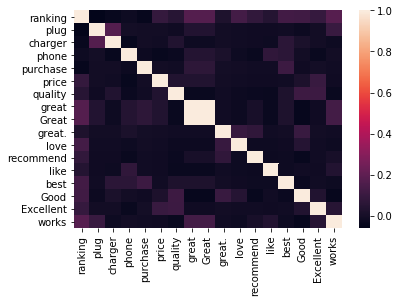

In [66]:
#heatmap demonstrates if the selected features are trulying independent and usable as predictors for ranking(dependent variable)
sns.heatmap(amazon.corr())


The heatmap above demonstrates most of the features are independent. Great and great are dependent on one another.

## Naive Bayes

In [50]:
data = amazon[keywords]
target = amazon['ranking']

In [51]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

In [52]:
bnb.score(data, target)

0.64

Based on the score, the features have a 64% accuracy. Feature manipulation, adding more keywords, should increase accuracy.

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(target, y_pred)

array([[461,  39],
       [321, 179]], dtype=int64)

## Tfidf & K-means

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [56]:
a2 = pd.read_csv(data_path, sep= '\t', header=None)

In [57]:
a2.columns = ['Comment', 'ranking']

In [58]:
X = a2['Comment']
Y = a2['ranking']

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the comments
                             min_df=3, # only use words that appear at least three times
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer comments and shorter comments get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer to training set
X_tfidf = vectorizer.fit_transform(X)
print("Number of features: %d" % X_tfidf.get_shape()[1])



#Reshapes the vectorizer output into something people can read
X_tfidf_csr = X_tfidf.tocsr()


#number of comments
n = X_tfidf_csr.shape[0]
print('number of comments: %d' %n)


#A list of dictionaries, one per comment
tfidf_bycomment = [{} for _ in range(0,n)]


#List of features
terms = vectorizer.get_feature_names()

Number of features: 377
number of comments: 1000


In [59]:
#for each comment, lists the feature words and their tf-idf scores
for i, j in zip(*X_tfidf_csr.nonzero()):
    tfidf_bycomment[i][terms[j]] = X_tfidf_csr[i, j]

In [60]:
#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Review:', Y.iloc[4])
print('Original sentence:', X.iloc[4])
print('Tf_idf vector:', tfidf_bycomment[4])

Review: 1
Original sentence: The mic is great.
Tf_idf vector: {'great': 0.4666650388743726, 'mic': 0.8844341363224174}


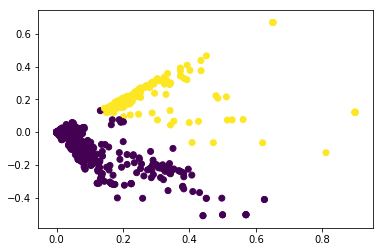

Comparing k-means clusters against the data:
ranking    0    1
row_0            
0        428  421
1         72   79


In [61]:
from sklearn.decomposition import TruncatedSVD
# We are limiting our feature space to 2 components here. 
#  This makes it easier to graph and see the clusters.
svd= TruncatedSVD(2)

# Normalize the data.
#X_norm = normalize(X_tfidf)

# Reduce it to two components.
X_svd = svd.fit_transform(X_tfidf)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_svd)

# Plot the solution.
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, Y))

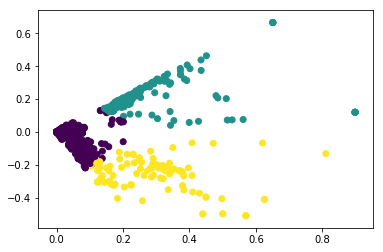

Comparing k-means clusters against the data:
ranking    0    1
row_0            
0        425  313
1         70   75
2          5  112


In [62]:
# We are limiting our feature space to 2 components here. 
#  This makes it easier to graph and see the clusters.
svd= TruncatedSVD(2)

# Normalize the data.
#X_norm = normalize(X_tfidf)

# Reduce it to two components.
X_svd = svd.fit_transform(X_tfidf)

# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_svd)

# Plot the solution.
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, Y))

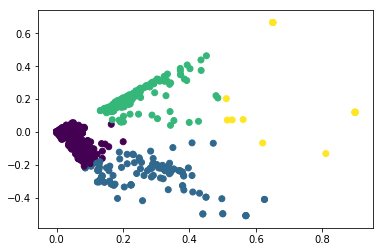

Comparing k-means clusters against the data:
ranking    0    1
row_0            
0        421  306
1          5  113
2         72   64
3          2   17


In [63]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_svd)

# Plot the solution.
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, Y))